# FELLOWSHIP AI - IMDB REVIEWS NLP CHALLENGE

-**SHRESHT VENKATRAMAN
shresht.v24@gmail.com**

Hi, This Notebook contains my submission for the Fellowship AI coding challenge. Please find the details of the challenge below. 

We begin by importing the required packages and loading the dataset:

In [1]:
import pandas as pd
import numpy as np
import wordcloud
from sklearn.model_selection import train_test_split
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

In [2]:
data = pd.read_csv("Downloads/IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# EXPLORING THE DATA SET

Now that we have loaded the dataset we will first exploring the data set to understand what kind of data we have to work with:

Examining the 'Sentiment' column below, we see that there are an **equal** number of comments classified as 'Positive' & 'Negative'.

This is useful because it means that our data set is not inherently biased and we do not need to make an unbiased sample from the dataset

In [36]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Examining the classes

We will now examine the comments classified as positive and negative to see if there are any patterns/ extractable features from the comments in the data set.

In [37]:
## Filtering the data set into only containing the respective positive and negative comments
neg_comments = data.loc[data['sentiment'] == 'negative'] ## DATA FRAME OF NEGATIVE-LABELLED COMMENTS;
pos_comments = data.loc[data['sentiment'] == 'positive'] ## DATA FRAME OF POSITIVE-LABELLED COMMENTS;
neg_comments.reset_index(inplace=True) #Resetting Indices for plotting
pos_comments.reset_index(inplace=True) #Resetting Indices for plotting

neg_comments = neg_comments.rename(columns = {'review':'negative_review'}) #Resetting column names for plotting
pos_comments = pos_comments.rename(columns = {'review':'positive_review'}) #Resetting column names for plotting


### Plotting Comment Length

We will plot a Histogram to see view the general distribution of comment lengths across both classes:

<AxesSubplot:>

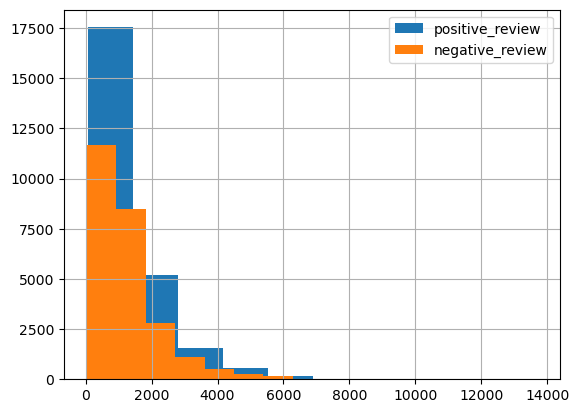

In [38]:
pos_comments.positive_review.str.len().hist(legend = True)
neg_comments.negative_review.str.len().hist(legend = True)

- We see above that the general distribution of the 2 classes' comment size is roughly the same.
- We also see that for both classes, the majority of reviews are less than 2000 characters. 
- The longest reviews tend to be positive


# Cleaning the Data

We can learn even more about the data set when we clean the data up a little bit and remove many unecesarry things like : 

- HTML Tags
- Stopwords like 'in', 'at' , 'and' , 'of' ,etc. 
- Special characters like /, : , . , etc.
- Word modifications and infelctions

## 1) Binarizing our Sentiment Variable (y) 

In order to make our ML-modeling process easier, we will binarize our Sentiment Label - positive / negative into a numerical formal of 1 - Positive and 0 - Negative

In [39]:
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',0,inplace=True)

In [40]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


As seen above, our 'sentiment' columns now contains 0-1 instead of positive - negative

## 2)  REMOVING HTML TAGS
As we can see below many of the reviews have HTML tags like <'br/>. We want to remove these before we implement our Sentiment Analysis Model. 

In [41]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [42]:
## Removing HTML Tags
import re
def html_cleaner(text):
    clean = re.compile(r'<.*?>')
    return re.sub(clean,'',text)

data['review'] = data['review'].apply(html_cleaner)

As seen below the HTML tags have been removed:

In [43]:
data['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

## 3) CONVERTING TO LOWER CASE

Case differences usually don't help us too much with Sentiment Analysis, they are used more as Intensifiers as opposed to indicators of 'positive' or 'negative'. Hence we will remove them from our reviews.

In [44]:
data['review'] = data['review'].apply(lambda x: x.lower())
data['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

## 4) REMOVING SPECIAL CHARACTERS

As seen in the text above, there are still occasional characters like **\** or **;** that don't really aid our Sentiment Analysis model.So we remove them below

In [45]:
def special_char(text):
    char = ''
    for i in text:
        if i.isalnum():
            char = char + i
        else:
            char = char + ' ';
    return char

data['review'] = data['review'].apply(special_char)

As seen below we only have text, in the lowercase, without special characters and punctuation. 

In [46]:
data['review'][1]

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

## 5) REMOVING 'STOPWORDS'

**Stopwords**: refer to words like *“the”, “a”, “an”, “in”* , which are mere grammitical particles that do not provide much value to our Sentiment Analysis Model. Thus removing them saves us space in our data set as well as reduces the redundancy in time taken to analyse the data set. 

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def remove_stopwords(text):
    stop_words_set = set(stopwords.words('english'))
    word_list = word_tokenize(text)
    
    return [i for i in word_list if i not in stop_words_set]

In [48]:
data['review'] = data['review'].apply(remove_stopwords)

data['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da

## 6) OBTAIN WORD STEMS

In many words, we have conjugational, inflexional prefixes and suffixes that have grammatical use but are not useful for our Sentiment Analysis model. As a result remove these additional inflexions to obtain just the word-stems.

In [49]:
from nltk.stem import SnowballStemmer

def obtain_stem(text):
    
    eng_stems = SnowballStemmer('english')
    return " ".join([eng_stems.stem(word) for word in text])
  

In [50]:
data['review'] = data['review'].apply(obtain_stem)

As seen below, we have removed many of the inflexional and conjugational prefixes and suffixes from the reviews and the resulting review appears as below:

In [51]:
data['review'][1]

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

# MODEL BUILDING

We can now proceed to building and testing various models

## 1) BAG OF WORDS (BOW)

A **Bag-of-Words** is a representation of text that describes the occurrence of words within a document. It involves two things:

 - A vocabulary of known words.
 - A measure of the presence of known words.

The simplest measurement is to mark the presence of words in a given text as a boolean value, 0 for absent, 1 for present.

In [52]:
## Importing required package to create BOW:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
## X represents out Reviews
## y represents the predicted value of Positive (1) or Negative (0)

X = data.iloc[:,0]
y = data.iloc[:,1]

In [54]:
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Split into Train, Test and Validation


In [56]:
## Split the data into train:validation:test in a ration of 80:10:10; 

X_train,X_rem,y_train,y_rem = train_test_split(X,y,train_size=0.8,random_state=9)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [57]:
print("Training Set sizes: X: {}, y: {}".format(X_train.shape, y_train.shape))

print("Validation Set sizes: X: {}, y: {}".format(X_valid.shape, y_valid.shape))

print("Test Set sizes: X: {}, y: {}".format(X_test.shape, y_test.shape))


Training Set sizes: X: (40000, 1000), y: (40000,)
Validation Set sizes: X: (5000, 1000), y: (5000,)
Test Set sizes: X: (5000, 1000), y: (5000,)


In [58]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## MODEL 1) NAIVE BAYES - GAUSSIAN (GNB)

In a Gaussian Naive Bayes we assume that the words associated with each class( i.e positive or negative) are distributed along a **Normal Distribution**. This means that the probability density function (PDF) of a given word can be modelled using a **Gaussian Function** of the form :  

$p(x =v\mid y_{k})={\frac {1}{\sqrt {2\pi \sigma _{k}^{2}}}}\,e^{-{\frac {(v-\mu _{k})^{2}}{2\sigma _{k}^{2}}}}$

Where k = 2 (Number of classes - 0,1)

For each word x the classifer calculates the probablity **P(x| Y = y).P(Y=y)** for each class (0/1) y. In our case , if P(x| Y = 0).P(Y=0) > P(x| Y = 1).P(Y=1) , then our classifer predicts 0 (negative) and vice versa.

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
#Initialize the Gaussian Naive Bayes Calssifyer
gnb = GaussianNB()

#Fit our training sets
gnb.fit(X_train,y_train)

GaussianNB()

## MODEL 2) MULTIVARIATE NAIVE BAYES (MNB)

In a Multivariate Model we assume that the words are not *discrete* variables but *continuous* variables therefore are distributed along a **Multinomial Distribution**. The Likelihood function of a Multivariate Distribution is as follows:

$p(\mathbf {x} \mid C_{k})={\frac {(\sum _{i=1}^{n}x_{i})!}{\prod _{i=1}^{n}x_{i}!}}\prod _{i=1}^{n}{p_{ki}}^{x_{i}}$

In order to find the maximizer of the above likelihood function, we take the log of the function and try to maximize it:

${\displaystyle {\begin{aligned}\log p(C_{k}\mid \mathbf {x} );=\log p(C_{k})+\sum _{i=1}^{n}x_{i}\cdot \log p_{ki}\\= \log p(C_{k}) +\mathbf {w} _{k}^{\top }\mathbf {x} \end{aligned}}}$

Where ${w} _{k}^{\top }\mathbf {x} $ referes to the covariance matrix of the multivariate distribution


In [61]:
from sklearn.naive_bayes import MultinomialNB

#Initialize the Bernoulli Multinomial Bayes Calssifyer
mnb = MultinomialNB(alpha=1.0,fit_prior=True)

#Fit our training sets
mnb.fit(X_train,y_train)

MultinomialNB()

## MODEL 3) BERNOULLI NAIVE BAYES (BNB)

This is similar to a Multivariate Model, except individual words are treated as **Bernouli Random Variables**. That is, they are treated as Binary Variables- 0-1. This means that BNM differs from MNB, in that BNB measures onnly the presence/absence of a word. However a MNB measures the frequency (# of occourances) of a given word in a text. 

The likelihood function is as follows:

${\displaystyle p(\mathbf {x} \mid C_{k})=\prod _{i=1}^{n}p_{ki}^{x_{i}}(1-p_{ki})^{(1-x_{i})}}$

In [62]:
from sklearn.naive_bayes import BernoulliNB

#Initialize the Bernoulli Naive Bayes Calssifiyer
bnb = BernoulliNB(alpha=1.0,fit_prior=True)

#Fit our training sets
bnb.fit(X_train, y_train)

BernoulliNB()

## MODEL 4) VADER SENTIMENT ANALYSIS

**VADER**(*Valence Aware Dictionary and Sentiment Reasoner*) is a fully open-source lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
Given the nature of IMBDB Ratings as bearing some resemblence to Social- Media and microblogging sites, this lexicon might be usefull in increasing model accuracy as it is designed to handle slang and social-media related lexicons.

However, unlike our previous models the VADER lexicon assigns a *sentiment score* to each prediction. We then assign the classification of positive/negative(0,1) depending on a user-defined threshold. 

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer 
# Download the VADER lexicon = nltk.download('vader_lexicon')


#Initialize the NLTK Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [64]:
def calculate_sentiment_score(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

### Create New Test-Train-Valid Set for the VADER Mode

The Test, Train and Validity Tests on our previous models had been vectorized, i.e they no longer carried the same textual information. So we go use our original *cleaned* data set to create a new textual (String) test-train-validity set. 

In [65]:
#X,y for Review and Sentiment respectively
X1 = data.iloc[:,0]
y1 = data.iloc[:,1]

In [66]:
scores = X1.apply(calculate_sentiment_score)

# TESTING & EVALUATING MODELS

Having fit all our models we will test how well they perform on our testing and validation sets

In [67]:
from sklearn.metrics import accuracy_score

### Gaussian Naive Bayes:

In [68]:
valid_gaussian = gnb.predict(X_valid)
test_gaussian = gnb.predict(X_test)

**Accuracy**:

In [69]:
print("Gaussian_Validation_Accuracy = ",accuracy_score(y_valid,valid_gaussian))
print("Gaussian_Testing_Accuracy = ",accuracy_score(y_test,test_gaussian))

Gaussian_Validation_Accuracy =  0.7814
Gaussian_Testing_Accuracy =  0.7872


### Multivariate Naive Bayes:

In [70]:
valid_multiv = mnb.predict(X_valid)
test_multiv = mnb.predict(X_test)

**Accuracy:**

In [71]:
print("Multivariate_Validation_Accuracy = ",accuracy_score(y_valid,valid_multiv))
print("Multivariate_Testing_Accuracy = ",accuracy_score(y_test,test_multiv))

Multivariate_Validation_Accuracy =  0.8326
Multivariate_Testing_Accuracy =  0.8294


### Bernouli Naive Bayes:

In [72]:
valid_bern = bnb.predict(X_valid)
test_bern = bnb.predict(X_test)

**Accuracy:**

In [73]:
print("Bernouli_Validation_Accuracy = ",accuracy_score(y_valid,valid_bern))
print("Bernouli_Testing_Accuracy = ",accuracy_score(y_test,test_bern))

Bernouli_Validation_Accuracy =  0.835
Bernouli_Testing_Accuracy =  0.8422


### Vader Analysis:

In [74]:
Vader_prediction = (scores>0).astype(int)

**Accuracy:**

In [75]:
print("VADER_Accuracy = ",accuracy_score(y1,Vader_prediction))

VADER_Accuracy =  0.65336


## PRIMARY ACCURACY RANKING:

- 1) Bernouli Naive Bayes - 83.8% Testing Accuracy
- 2) Multivariate Naive Bayes - 83.2% Testing Accuracy
- 3) Gaussian Naive Bayes - 78.4% Testing Accuracy
- 4) VADER Sentiment Analysis - 65.3%

# IMPROVING ACCURACY

We see that our **VADER Analysis** performed the worse out of the models. I suspect that this might be cause due to the cleaning process affecting the ability of the model. 

In [76]:
data1 = pd.read_csv("Downloads/IMDB Dataset.csv")
data1['review'] = data1['review'].apply(html_cleaner)

In [77]:
data1['review'] = data1['review'].apply(lambda x: x.lower())

In [78]:
data1['review'] = data1['review'].apply(remove_stopwords)

In [79]:
data1['review'] = data1['review'].apply(lambda x: " ".join([word for word in x]))

In [80]:
scores_v2 = scores = data1['review'].apply(calculate_sentiment_score)

In [81]:
Vader_prediction2 = (scores>0).astype(int)
print("VADER_NEW_Accuracy = ",accuracy_score(y1,Vader_prediction2))

VADER_NEW_Accuracy =  0.67528
